Movie Review Sentiment Analysis

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
'''
# Load the IMDB dataset
print("Loading IMDB dataset...")
vocab_size = 10000  # Keep top 10,000 most frequent words
max_length = 300    # Maximum review length (words)

# Load dataset (already preprocessed as sequences of word indices)
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=vocab_size)

print(f"Training samples: {len(X_train)}")
print(f"Testing samples: {len(X_test)}")
print(f"First review (as word indices): {X_train[0][:10]}...")

# Decode a sample review to see actual text
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in X_train[0]])
print(f"\nSample review text: {decoded_review[:200]}...")
'''

'\n# Load the IMDB dataset\nprint("Loading IMDB dataset...")\nvocab_size = 10000  # Keep top 10,000 most frequent words\nmax_length = 300    # Maximum review length (words)\n\n# Load dataset (already preprocessed as sequences of word indices)\n(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=vocab_size)\n\nprint(f"Training samples: {len(X_train)}")\nprint(f"Testing samples: {len(X_test)}")\nprint(f"First review (as word indices): {X_train[0][:10]}...")\n\n# Decode a sample review to see actual text\nword_index = imdb.get_word_index()\nreverse_word_index = dict([(value, key) for (key, value) in word_index.items()])\ndecoded_review = \' \'.join([reverse_word_index.get(i - 3, \'?\') for i in X_train[0]])\nprint(f"\nSample review text: {decoded_review[:200]}...")\n'

In [ ]:
# Load the IMDB dataset
print("Loading IMDB dataset...")
vocab_size = 10000  # Keep top 10,000 most frequent words
max_length = 300    # Maximum review length (words)

Loading IMDB dataset...


In [ ]:
# Load dataset (already preprocessed as sequences of word indices)
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=vocab_size)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
print(f"Training samples: {len(X_train)}")
print(f"Testing samples: {len(X_test)}")
print(f"First review (as word indices): {X_train[0][:10]}...")

Training samples: 25000
Testing samples: 25000
First review (as word indices): [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65]...


In [ ]:
# Decode a sample review to see actual text
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in X_train[0]])
print(f"\nSample review text: {decoded_review[:200]}...")

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step

Sample review text: ? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the sa...


Preprocess Data for Modeling

In [ ]:
# Pad sequences to make them the same length
print("Padding sequences...")
X_train_padded = pad_sequences(X_train, maxlen=max_length, padding='post')
X_test_padded = pad_sequences(X_test, maxlen=max_length, padding='post')

print(f"Original sequence length: {len(X_train[0])}")
print(f"Padded sequence shape: {X_train_padded.shape}")
print(f"Sample padded sequence: {X_train_padded[0][:20]}...")
'''
# Check class distribution
print(f"\nClass distribution in training set:")
print(f"Positive reviews (1): {np.sum(y_train == 1)} samples")
print(f"Negative reviews (0): {np.sum(y_train == 0)} samples")
'''

Padding sequences...
Original sequence length: 218
Padded sequence shape: (25000, 300)
Sample padded sequence: [   1   14   22   16   43  530  973 1622 1385   65  458 4468   66 3941
    4  173   36  256    5   25]...


'\n# Check class distribution\nprint(f"\nClass distribution in training set:")\nprint(f"Positive reviews (1): {np.sum(y_train == 1)} samples")\nprint(f"Negative reviews (0): {np.sum(y_train == 0)} samples")\n'

In [ ]:
# Check class distribution
print(f"\nClass distribution in training set:")
print(f"Positive reviews (1): {np.sum(y_train == 1)} samples")
print(f"Negative reviews (0): {np.sum(y_train == 0)} samples")


Class distribution in training set:
Positive reviews (1): 12500 samples
Negative reviews (0): 12500 samples


Implement Logistic Regression Model

Preparing data for Logistic Regression...
BoW feature matrix shape: (5000, 5000)

Training Logistic Regression model...

Logistic Regression Results:
Accuracy: 0.8520

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.84      0.86       526
           1       0.83      0.86      0.85       474

    accuracy                           0.85      1000
   macro avg       0.85      0.85      0.85      1000
weighted avg       0.85      0.85      0.85      1000



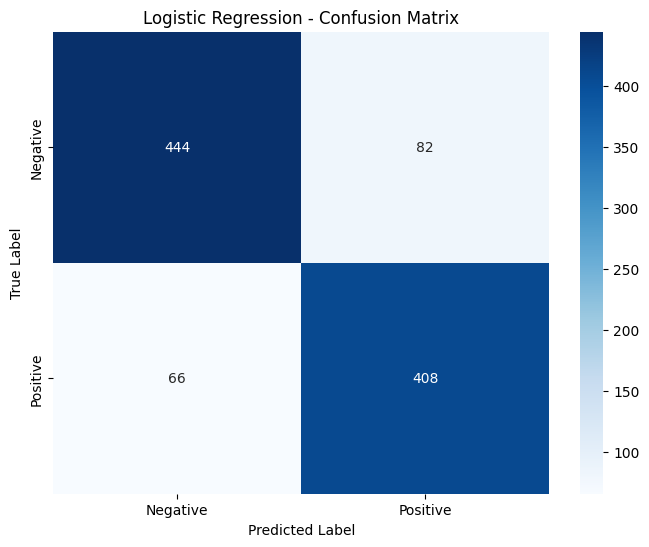

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

# Convert sequences back to text for CountVectorizer
def decode_sequences(sequences):
    texts = []
    for seq in sequences:
        text = ' '.join([reverse_word_index.get(i - 3, '?') for i in seq if i > 0])
        texts.append(text)
    return texts

print("Preparing data for Logistic Regression...")
train_texts = decode_sequences(X_train[:5000])  # Use subset for speed
test_texts = decode_sequences(X_test[:1000])
train_labels = y_train[:5000]
test_labels = y_test[:1000]

# Create Bag-of-Words features
vectorizer = CountVectorizer(max_features=5000)
X_train_bow = vectorizer.fit_transform(train_texts)
X_test_bow = vectorizer.transform(test_texts)

print(f"BoW feature matrix shape: {X_train_bow.shape}")

# Train Logistic Regression
print("\nTraining Logistic Regression model...")
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train_bow, train_labels)

# Make predictions
y_pred_lr = lr_model.predict(X_test_bow)

# Evaluate
print("\nLogistic Regression Results:")
print(f"Accuracy: {accuracy_score(test_labels, y_pred_lr):.4f}")
print("\nClassification Report:")
print(classification_report(test_labels, y_pred_lr))

# Confusion Matrix
cm = confusion_matrix(test_labels, y_pred_lr)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.title('Logistic Regression - Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

Implement LSTM Model

Building LSTM model...
Model Summary:


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)


Training LSTM model...
Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 378s 1s/step - accuracy: 0.5153 - loss: 0.6916 - val_accuracy: 0.5486 - val_loss: 0.6663
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 339s 1s/step - accuracy: 0.5709 - loss: 0.6437 - val_accuracy: 0.5630 - val_loss: 0.6490
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 375s 1s/step - accuracy: 0.5932 - loss: 0.6038 - val_accuracy: 0.5602 - val_loss: 0.6632
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 376s 1s/step - accuracy: 0.6113 - loss: 0.5740 - val_accuracy: 0.5782 - val_loss: 0.6775
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 328s 1s/step - accuracy: 0.6122 - loss: 0.5591 - val_accuracy: 0.7680 - val_loss: 0.6296

Evaluating LSTM model...
Test Accuracy: 0.7668
Test Loss: 0.6272


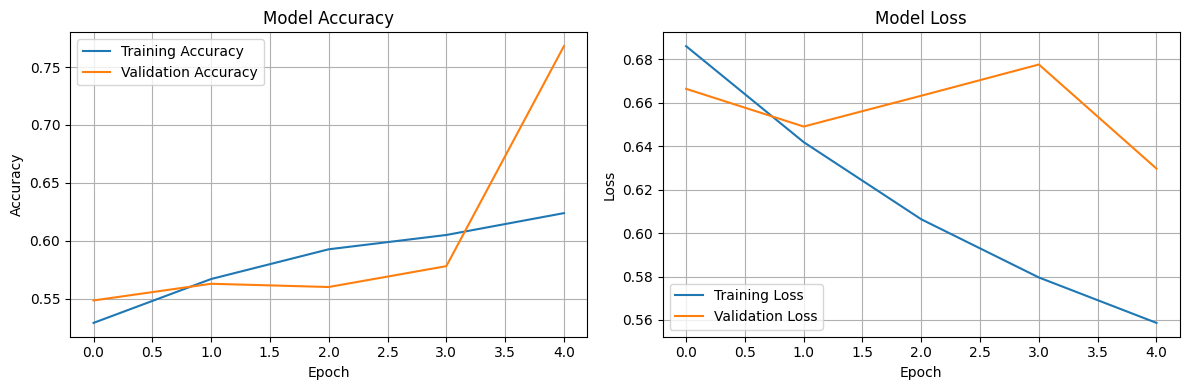

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

print("Building LSTM model...")
embedding_dim = 128  # Size of word embeddings

# Create LSTM model
lstm_model = Sequential([
    # Embedding layer converts word indices to dense vectors
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length),

    # LSTM layer with dropout for regularization
    LSTM(128, return_sequences=False, dropout=0.3, recurrent_dropout=0.3),

    # Dense layers
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Output: probability of positive review
])

# Compile model
lstm_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

print("Model Summary:")
lstm_model.summary()

# Train the model
print("\nTraining LSTM model...")
history = lstm_model.fit(
    X_train_padded, y_train,
    validation_split=0.2,
    epochs=3,
    batch_size=64,
    verbose=1
)

# Evaluate on test set
print("\nEvaluating LSTM model...")
test_loss, test_acc = lstm_model.evaluate(X_test_padded, y_test, verbose=0)
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")

# Plot training history
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

Compare Both Models

In [ ]:
print("="*60)
print("MODEL COMPARISON: Logistic Regression vs LSTM")
print("="*60)

# Test LSTM predictions
y_pred_lstm_probs = lstm_model.predict(X_test_padded[:1000])
y_pred_lstm = (y_pred_lstm_probs > 0.5).astype(int).flatten()

print(f"\nLogistic Regression Accuracy: {accuracy_score(test_labels, y_pred_lr):.4f}")
print(f"LSTM Accuracy: {accuracy_score(y_test[:1000], y_pred_lstm):.4f}")

# Compare on sample reviews
sample_reviews = [
    "This movie was absolutely fantastic! The acting was superb and the plot kept me engaged throughout.",
    "A complete waste of time. Terrible acting, boring story, and unlikeable characters.",
    "Not bad, but not great either. Some good moments but overall mediocre.",
    "One of the best films I've seen this year. Highly recommended to everyone!"
]

def predict_sentiment(text, model_type='lstm'):
    if model_type == 'lstm':
        # Convert text to sequence
        words = text.lower().split()
        seq = []
        for word in words:
            if word in word_index and word_index[word] < vocab_size:
                seq.append(word_index[word] + 3)
        if len(seq) == 0:
            seq.append(1)  # Unknown word

        # Pad and predict
        seq_padded = pad_sequences([seq], maxlen=max_length, padding='post')
        prob = lstm_model.predict(seq_padded, verbose=0)[0][0]
    else:
        # Logistic Regression prediction
        text_vec = vectorizer.transform([text])
        prob = lr_model.predict_proba(text_vec)[0][1]

    sentiment = "Positive" if prob > 0.5 else "Negative"
    confidence = prob if prob > 0.5 else 1 - prob
    return sentiment, confidence

print("\nSample Predictions:")
for review in sample_reviews:
    lr_sentiment, lr_conf = predict_sentiment(review, 'lr')
    lstm_sentiment, lstm_conf = predict_sentiment(review, 'lstm')
    print(f"\nReview: {review[:80]}...")
    print(f"  Logistic Regression: {lr_sentiment} (confidence: {lr_conf:.2%})")
    print(f"  LSTM: {lstm_sentiment} (confidence: {lstm_conf:.2%})")

MODEL COMPARISON: Logistic Regression vs LSTM


NameError: name 'lstm_model' is not defined